# Python Machine Learning Textbook Notes

This notebook is notes and scripts on the ML textbook - Python Machine Learning. The first topic covered is the creation of the perceptron. Samples are $x_{i}$ and make up the the $X$ feature matrix. We are introduced to the idea of neurons by a binary classification task. The result can be (+1) positive class and (-1) negative class. 

Weights and inputs introduced as $W^{i}$ matrix and $X^{i}$ for each sample $i$. To be clear, these vectors contain all the attributes associated with that sample.

Net input defined as $z = W^{T} \cdot Z$. This then defines the decision function $\phi(z)$. We also have the input threshold $\theta$ . If the Net input is greater than threshold $\theta$, the result is positive class and +1 and negative class otherwise. To simplify we can also define a unit bias for a 0th weight $w^{0} = -\theta$ and $x^{0} = -1$ . To this end:

If the Net input is greater than 0, the result is positive class and +1 and negative class otherwise (less than zero), as we have included the threshold within the net input definition.

Time to build it: 1) Initialise all weights zero or random and small 2) For each training sample i compute the output value y and update the weights accordingly. Thus we introduce the perceptron learning rule. This is based on a simple model that stops improving once is has converged, and pushes towards a correct class when incorrect.

$\Delta W = \eta (y^{i} - \hat{y^{i}})x^{i}_{j}$ :  y is true class label and y_hat is predicted class label. Quick to see why it is a good choice to converge a model. $\eta$ is the learning rate and should be big enough to converge quickly but small enough to not blow up. The guaranteed convergance of the perceptron is based on the condition that the data points be linearly seperable and the learning rate be sufficiently small. The number of iterations the perceptron will encounter before converging are called epochs.

In [28]:
#Here some setup to what we want to achieve. Define n_iter and the learning rate.
#Based on a random state, use the numpy Randomstate function.
import numpy as np

test = np.random.RandomState(1)
print(test) #set seed for random state

print(test.normal(loc = 0.0 , scale = 0.01 , size = 5)) 
#loc states position of peak of norm. dist , size is sample size chosen/elements in array

RandomState(MT19937)
[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]


In [7]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data and initialise weights.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of
        samples and
        n_features is the number of features. 2D ARRAY
        y : array-like, shape = [n_samples] 
        Target values.                        1D ARRAY
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        #Reproducible random seed state
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1]) 
        #Generated at class call instance. Small random array of weights.
        #w_[0] is the threshold theta
        #Produce a sampling from a normal distribution of size number of features + 1 
        self.errors_ = []

        for _ in range(self.n_iter): #default here is 50 so does 50 loops
            errors = 0
            for xi, target in zip(X, y):
                delta_w = self.eta * (target - self.predict(xi)) #weight delta
                self.w_[1:] += delta_w * xi 
                self.w_[0] += delta_w #Bias unit
                errors += int(delta_w != 0.0) #if there is an update add to errors
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]


    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        #this is the input function phi(z)
        #if the z is greater than 0, input function is +1 else -1.

The approach here is some pythonic oriented object programming. A perceptron class is created with methods under it. By calling the Perceptron class, we initialise the objects involved. The $fit$ method initialises weight based on the normal distribution sample, including the bias unit and threshold theta. Weights must be non-zero such that the learning rate \eta has effect on the classification outcome. Otherwise the \eta would only affect magnitude of the weights and not the direction.

Lets try and apply the perceptron on an actual dataset, namely the Iris (flowers and features). For simplicity stick to two feature dimensions of sepal length and petal length. Easier to learn and visualise. Our two classes (equivalent to our +1 -1) are the Setosa and Versicolor species.

In [8]:
import pandas as pd
iris_df = pd.read_csv('iris.data', header = None)
iris_df.head() #150 rows (flowers)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We now want to extract the first 100 class labels, 50 Setosa and 50 versicolor, and convert to our +1 and -1 classes and assign to the target vector $y$. Choose first and third features of sepal and petal length respectively, which we use to create our feature matrix $X$. Then visualise it...

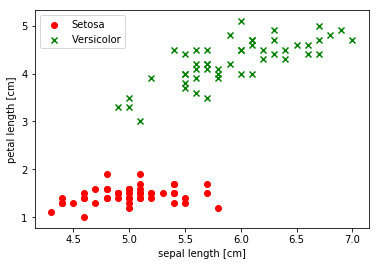

In [21]:
import matplotlib.pyplot as plt

y = iris_df.iloc[0:100,4].values #species column
y = np.where(y == 'Iris-setosa',-1,1)

X = iris_df.iloc[0:100,[0,2]].values #petal and sepal length matrix for first 100 samples

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='green',marker='x',label='Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Clearly this data meets our criteria for using the perceptron. It is clearly linearly seperable by human observation. Time to train our perceptron to find the decision boundry, and how many epochs it needs to converge on it.

In [10]:
ppn = Perceptron(eta = 0.1 , n_iter = 10)
ppn.fit(X,y)
ppn.errors_


[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]

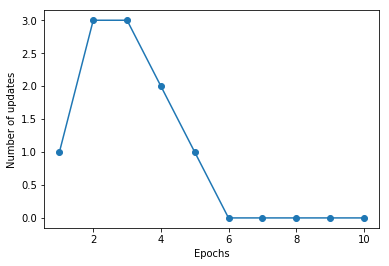

In [11]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

So our fit method took 6 epochs (loops) before converging the weights. The book advises the creation of a function to visualise the decision boundries for 2D datasets. We now have a $self.w_$ array of converged weights, and the sample array. So how could we plot the decision surface? Define a colours and markers from the ListerColormap. Determine min and max values for the two features, to create a pair of arrays xx1 and xx2 via np.meshgrid. We trained the perceptron classifier on 2D need to flatten gridarray to create matrix with same number of columns to be able to use the predict method on the z class labels.

In [27]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
    np.arange(x2_min, x2_max, 0.2))

Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
print(Z)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1

Now that we have run the $fit$ class method to converge our weights, we can use the $predict$ method to determine which classes this mesh of points will fall into. (See class structure)

In [12]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    # initialise the max and min sepal and petal lengths
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    #Using the min max create a range of evenly spaced values inbetween xmin xmax
    #Meshgrids creates a grid of points using these
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

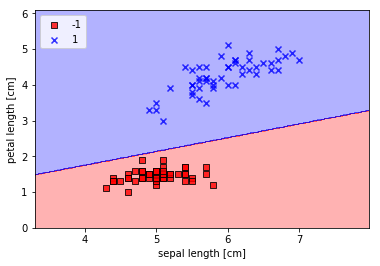

In [49]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

So to recap, we have used our simple perceptron structure to train our algorithm to converge on the appropriate weights and biases such that any new values fall into our two classes. Then we used an appropriately sized mesh grid of points and found which of those fell into +1 and -1, and used that to plot our decision boundary!

# ADAptive LInear NEuron (Adaline)

Adaline rule/ Widrow-Hoff rule is based on a linear activation function rather than a unis step function. The linear activation function $\phi(z)=\phi(W^{T}X) = W^{T}X$ is just the identity function. In supervised learning algorithms, an objective function is optimised, whic is often a cost function that we want to minimise. Define it as the sum squared or errors/misclassifications i.e. $J(w) = 1/2 \sum_{i} (y^{i} - \phi(z^{i})^{2} $. We wish to decend the gradient so $\Delta W = -\eta \nabla J(w)$ where $\eta$ is the learning rate (rate of descent). After some partial derivative magic (omitted for brevity), the equation becomes: 

$\Delta W = - \eta \nabla J(w) = \eta \sum_{i} (y^{i} - \phi(z^{i}))x_{j}^{i}  $
This allows us to make an Adaline class similar to our perceptron above:

In [29]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    cost_ : list
    Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of
        samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output) #1D array
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [31]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

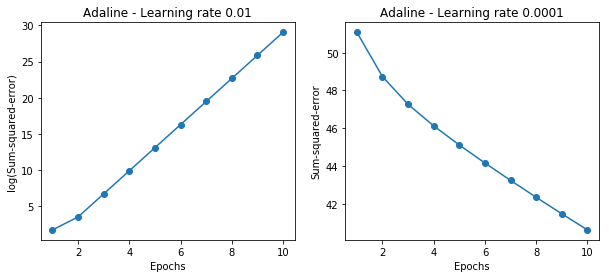

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')


AS we can see, the large learning rate actually diverged as it constantly overshot the cost function's minimum. However, the small learning rate had not converged even after 10 epochs. How do we choose an appropriate learning rate? A better choice would be to apply feature scaling and standardisation. This is where the mean of each feature (e.g. petal length) is centered at zero and has a standard deviation of 1. This can be done by doing $x-\mu / \sigma$ for each training sample per feature, to obtain the new standardised feature matrix $X'$

In [33]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

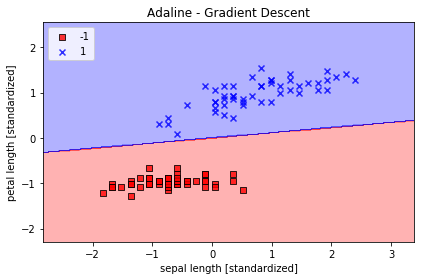

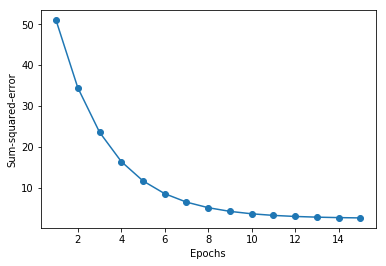

In [34]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In the above examples, the convergance of the weights is calculated from the whole training set. Aptly named batch gradient descent. This gets very intensive for large sets of data, so an alternative is stochastic/iterative gradient descent: Instead of updating the weights based on the sum of accumulated errors over all samples, we could instead update the weights incrementally for each individual sample...

PROS: Makes more adjustments to weights more frequently so converges faster. Can escape shallow local minima more readily.
<br>
CONS: More Surface noise. Need to have an adaptuve learning rate that decreases over epochs. Does not reach true convergance. Also important to present the data in every loop randomly as to avoid 'cycles'

In [36]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier with STOCHASTIC GD.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    cost_ : list
    Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=10, random_state=None,shuffle = True):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialised = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of
        samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
        size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

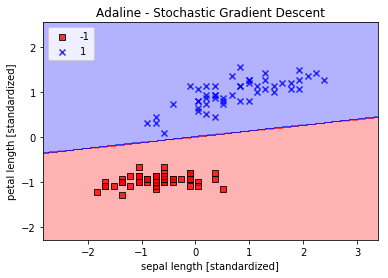

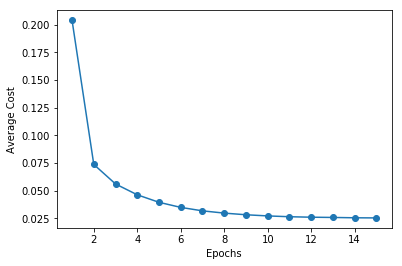

In [37]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()